<a href="https://colab.research.google.com/github/tejeshvaish/TensorFlow-Course/blob/master/CNN_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [7]:

df= pd.read_csv("diabetes2.csv")

In [8]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


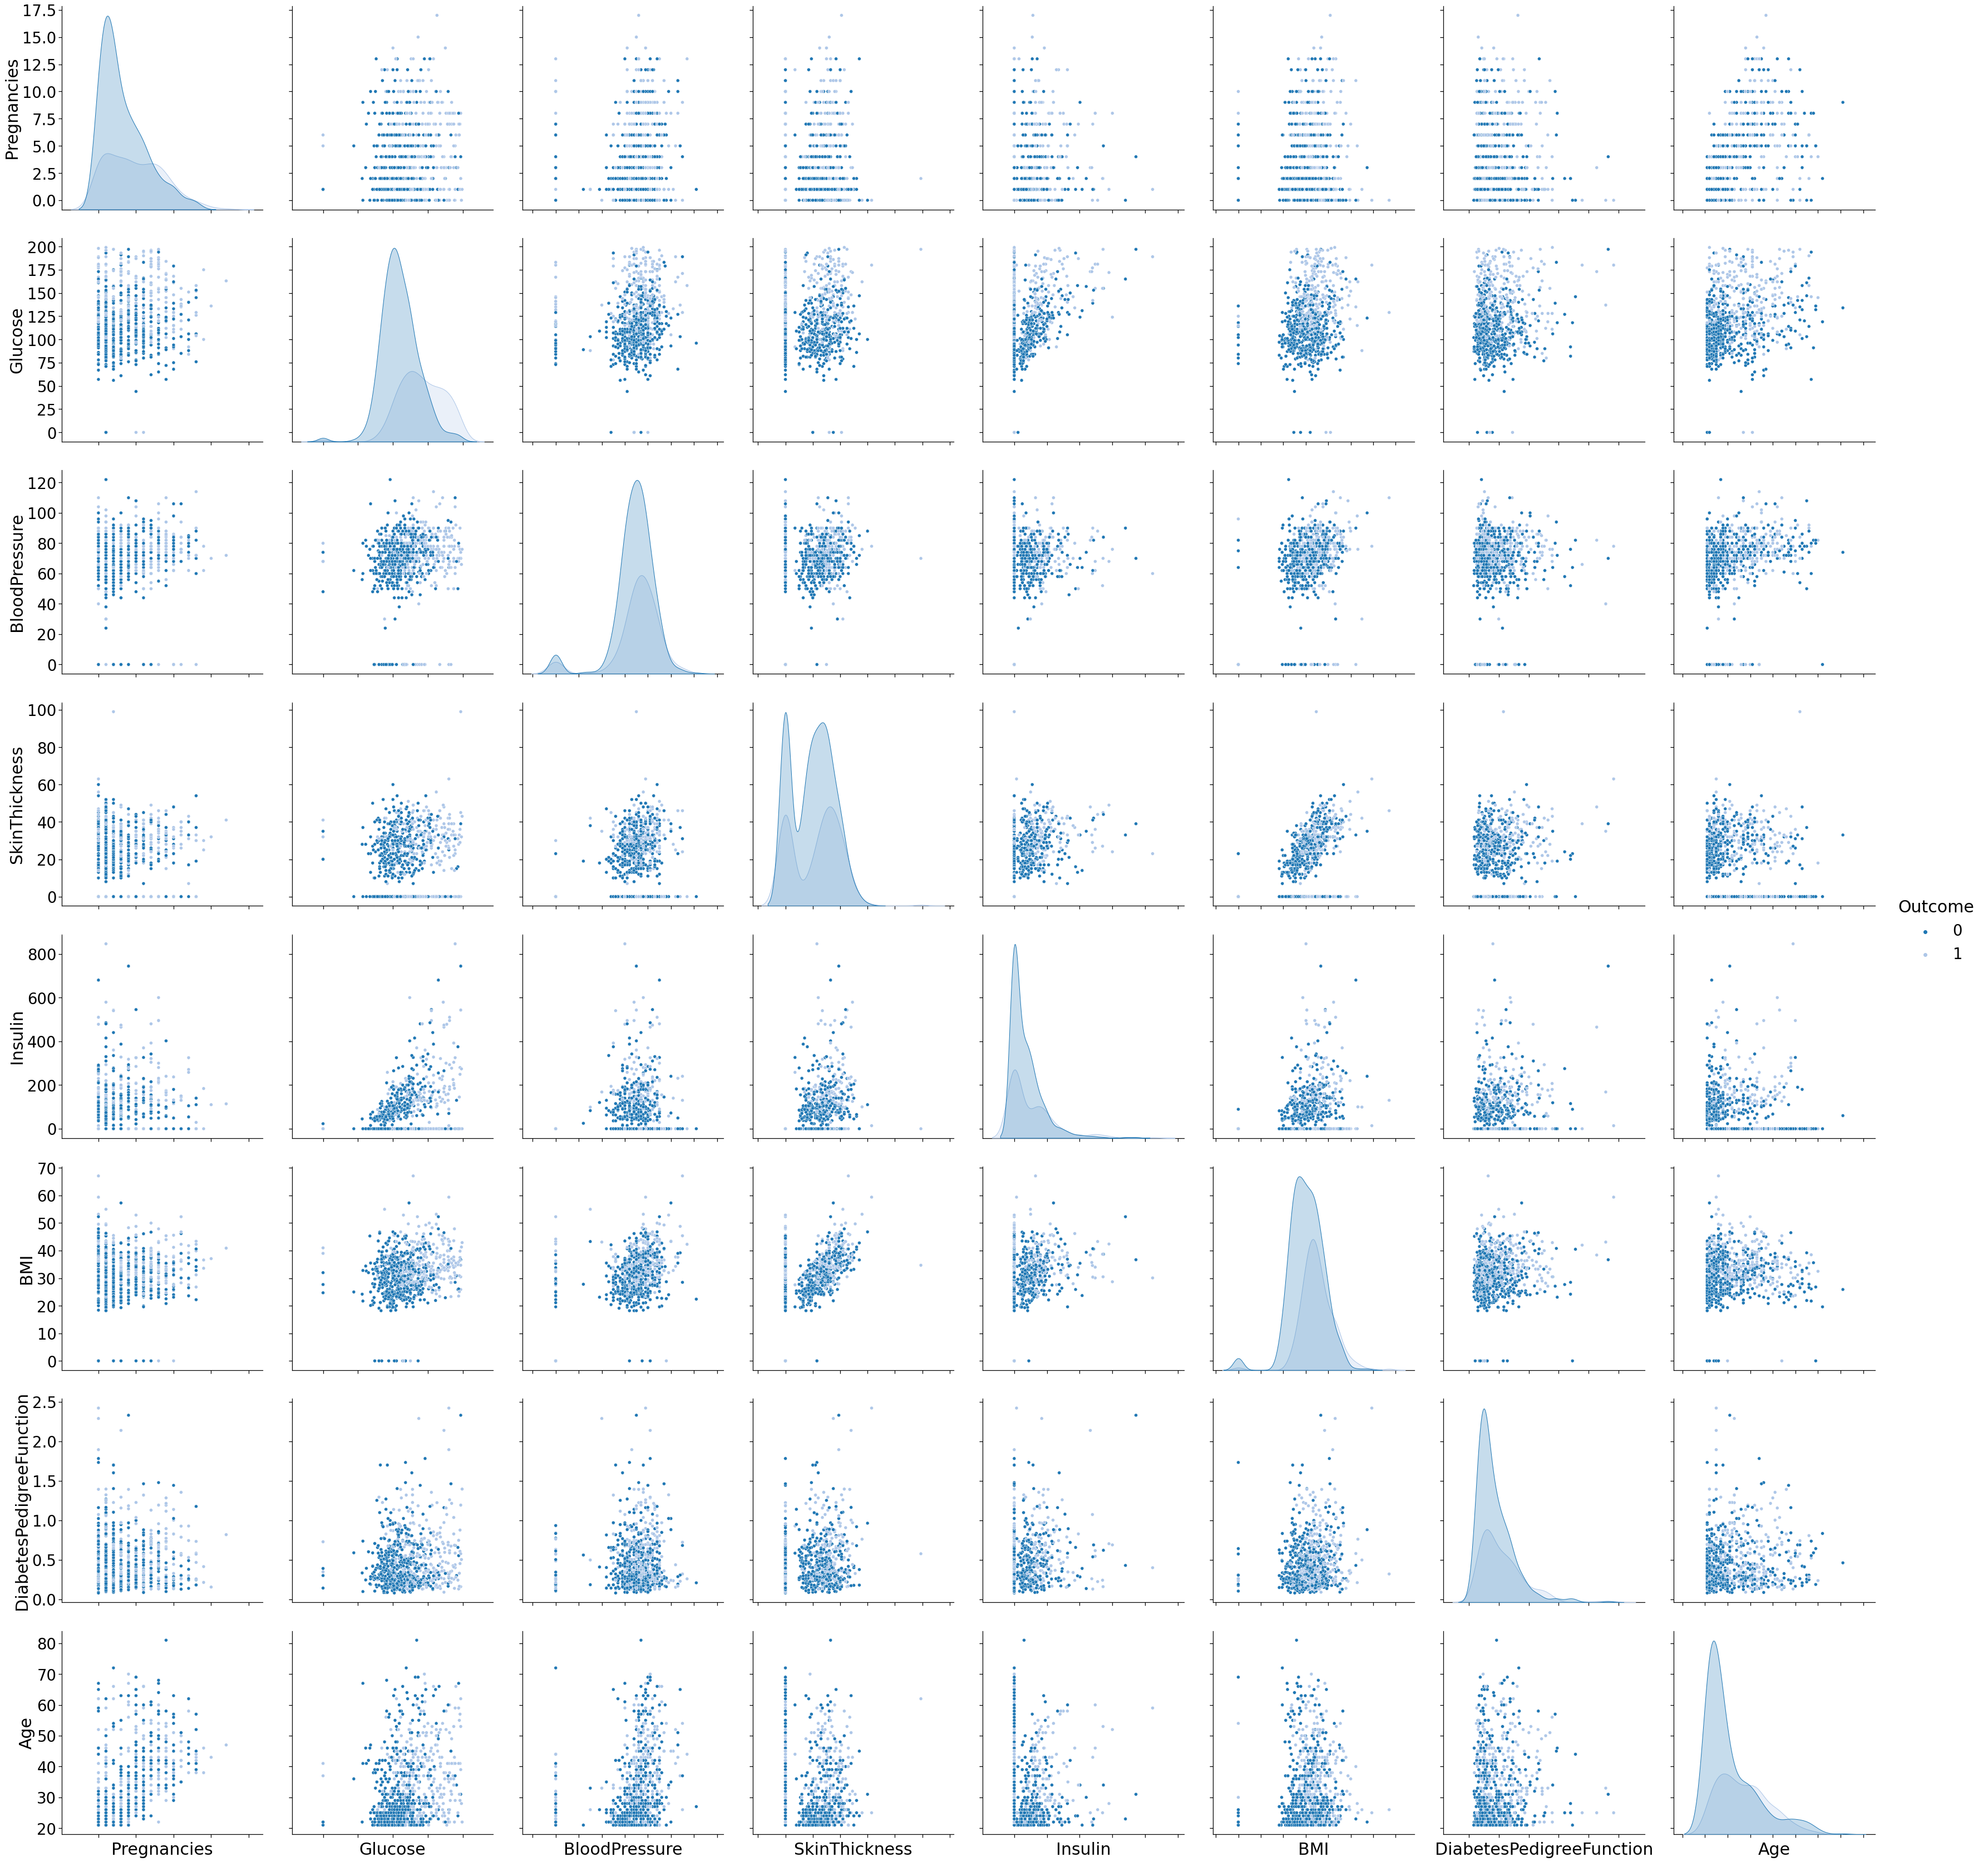

In [10]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df, 
                 hue='Outcome', palette='tab20',size=6)
g.set(xticklabels=[]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe71109bc10>,
      dtype=object)

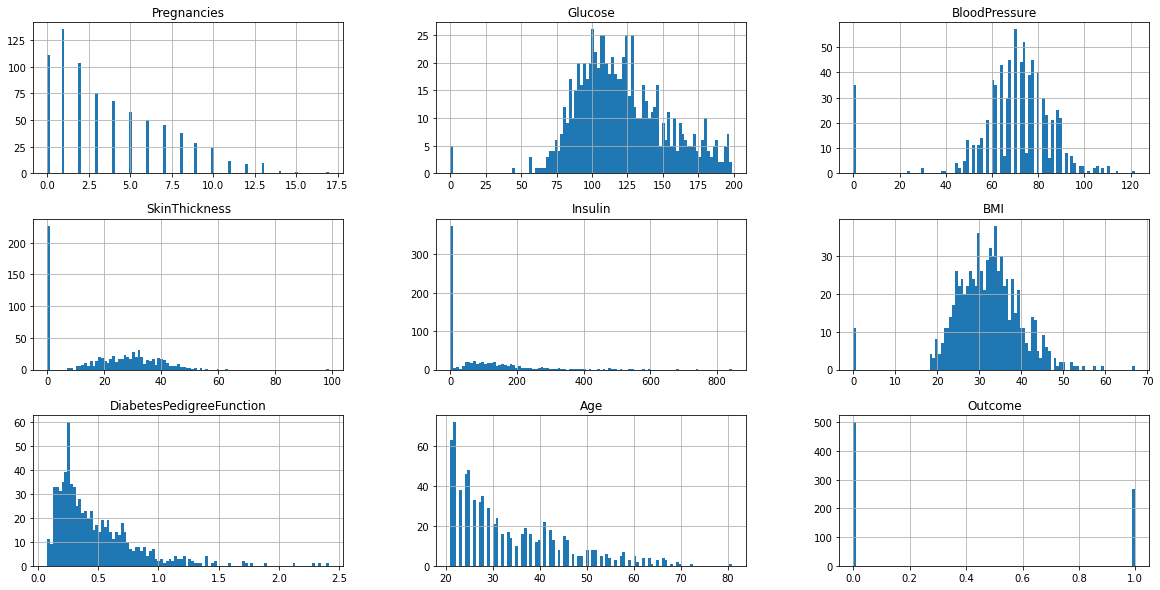

In [11]:
df.hist(figsize=(20,10), layout=None, bins=100)

In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
X= df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [70]:
print('Coefficients: ', regressor.coef_)


Coefficients:  [ 0.020704    0.00619789 -0.00252261 -0.00034974 -0.0001283   0.01315223
  0.11957526  0.00191531]


In [71]:
y_pred= regressor.predict(X_test)
# y= y_test
print('Residual sum squares: %.2f' % np.mean((y_pred - y_test) **2 ))


Residual sum squares: 0.16


In [72]:
print('Variance score: %.2f' % regressor.score(X_test,y_test)) # Explained variance score: 1 is perfect prediction


Variance score: 0.30


so, simple linear regression doesn't work well.

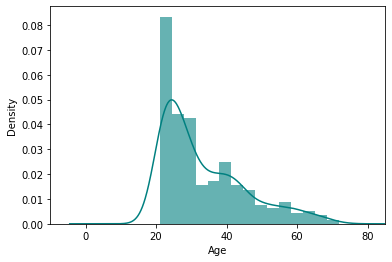

In [73]:
ax = X_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
X_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))  

Train/Test split results:
LogisticRegression accuracy is 0.779
LogisticRegression log_loss is 0.474
LogisticRegression auc is 0.844


So, we have 82.5% accuracy with logistic regression!

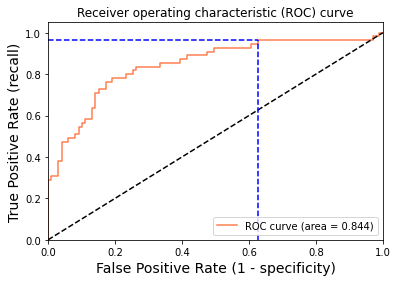

Using a threshold of 0.127 guarantees a sensitivity of 0.964 and a specificity of 0.374, i.e. a false positive rate of 62.63%.


In [76]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [77]:
import torch
import math
x_train= X_train
x_train["one"]=1
x_test= X_test
x_test["one"]=1


In [78]:
weights = torch.randn(9, 2) / math.sqrt(9)
weights.requires_grad_()
bias = torch.zeros(2, requires_grad=True)

In [79]:
x_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,one
663,9,145,80,46,130,37.9,0.637,40,1
712,10,129,62,36,0,41.2,0.441,38,1
161,7,102,74,40,105,37.2,0.204,45,1
509,8,120,78,0,0,25.0,0.409,64,1
305,2,120,76,37,105,39.7,0.215,29,1
426,0,94,0,0,0,0.0,0.256,25,1
13,1,189,60,23,846,30.1,0.398,59,1
480,3,158,70,30,328,35.5,0.344,35,1
682,0,95,64,39,105,44.6,0.366,22,1
607,1,92,62,25,41,19.5,0.482,25,1


In [80]:
# x_train= torch.tensor(x_train.values)
# x_train, y_train, x_valid, y_valid = map(torch.Tensor, (x_train.values,  y_train.values, x_test.values, y_test.values))
# x_train= x_train.values
# x_train, y_train, x_valid, y_valid = (x_train.values,  y_train.values, x_test.values, y_test.values)
x_train=torch.Tensor(x_train.values)[:]
x_test= torch.Tensor(x_test.values)[:]
y_train= torch.Tensor(y_train.values)[:]
y_test= torch.Tensor(y_test.values)[:]

In [81]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [82]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

In [29]:
bs = 64  # batch size
loss_func = nll
lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for
n =x_train.shape[0]
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

IndexError: ignored

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
x_train= X_train
x_test= X_test
# x_test["one"]=1


In [84]:
x_train,x_test,y_train,y_test=(x_train.values,x_test.values,y_train.values,y_test.values)

In [62]:
ones = np.ones((x_train.shape[0], 1))
x_train= np.concatenate((ones,x_train),axis=1)
ones = np.ones((x_test.shape[0], 1))

x_test = np.concatenate((ones,x_test),axis=1)


In [90]:
x_test.shape

(154, 8)

In [112]:
from math import sqrt
from numpy import mean
from numpy.random import rand
# number of nodes in the previous layer
n = 9
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
# generate random numbers
numbers = rand(8)
# scale to the desired range
w=np.full(8,0.01)
z = np.dot(x_train,w)
# print initial weights
print(sigmoid(z[:10]))
print(z[:10])

[0.99250034 0.95955047 0.98376216 0.95045644 0.98352259 0.76719861
 0.99999436 0.99863936 0.97586497 0.93461367]
[ 4.88537  3.16641  4.10404  2.95409  4.08915  1.19256 12.08498  6.59844
  3.69966  2.65982]


In [113]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
Y= sigmoid(z)
N= x_train.shape[0]
# calculate the cross-entropy error
def cross_entropy(T, Y,m):
    loss = -T*np.log(Y)-(1-T)*np.log(1-Y)
    cost = np.sum(loss)/m

    return cost;
    # return -np.mean(np.abs(T - Y)) * 100
  
learning_rate = 0.00000001
epoch =40000
for i in range(epoch):
    if i % 500 == 0:
        print(cross_entropy(y_train, Y,x_train.shape[0]))

    dw = (np.dot((Y-y_train).T,x_train))/x_train.shape[0]

    # gradient descent weight udpate
    w = w - learning_rate * dw

    # recalculate Y
    Y = sigmoid(np.dot(x_train,w))

print("Final w:", w)


2.2017424908134915
2.1574279926059936
2.1134604333681684
2.069858606409922
2.02664204344597
1.983831005188275
1.941446465885916
1.8995100911510523
1.8580442083999027
1.8170717692372862
1.7766163031248634
1.7367018616977867
1.6973529531345553
1.6585944660417553
1.6204515823909083
1.5829496791405353
1.5461142182942322
1.50997062528623
1.474544155750971
1.4398597509231141
1.4059418821299388
1.372814385079095
1.3405002849106098
1.3090216132715657
1.2783992189824842
1.2486525741923191
1.219799578258511
1.1918563619319467
1.164837094763697
1.1387537989677752
1.1136161732558088
1.089431430386457
1.0662041523233132
1.04393616694725
1.0226264502001214
1.002271057325915
0.9828630865065562
0.9643926776532267
0.9468470484098694
0.9302105685641894
0.9144648730657188
0.8995890127553591
0.8855596407624255
0.8723512313786407
0.8599363271344673
0.8482858088438997
0.8373691826085181
0.8271548772314609
0.8176105452254097
0.8087033606271288
0.8004003071558462
0.7926684508535544
0.7854751921811984
0.778788

In [121]:
def predict(w, x_test):
    z = sigmoid(np.dot( x_test,w.T))
    y_pred = np.zeros((1, x_test.shape[0]))
    for i in range(z.shape[0]):
        if z[i] <= 0.5:
            y_pred[0, i] = 0
        else:
            y_pred[0, i] = 1
            
    return y_pred

y_predict= predict(w,x_test)


In [122]:
cross_entropy(y_test,sigmoid(np.dot( x_test,w.T)),x_test.shape[0])

0.6989428838128804

###################################################################3
###############################################################################3
End of the notebook, implemented logistic regression with gradient descent!!

I have also done many courses in ML last year. And I was especially intrigued by the conv nn , due to the complexity and simplicity of them ;-) 

I hope, I am able to convey that I could implement something! 


In [44]:
def sigmoid(z):
    y_pred = 1/(1+np.exp(-z))
    return y_pred

In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
X= df.drop(["Outcome"],axis=1)
X= X/np.max(X)

In [55]:
y = df["Outcome"].values

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [57]:
def forback(w,b,x_train,y_train):
  z= np.dot(w.T,x_train)+b
  y_pred= sigmoid(z)
  loss = -y_train*np.log(y_pred)-(1-y_train)*np.log(1-y_pred)
  cost = np.sum(loss)/x_train.shape[1]

  dw = (np.dot(x_train,((y_pred-y_train).T)))/x_train.shape[0]
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
446,0.058824,0.502513,0.590164,0.121212,0.082742,0.377049,0.271901,0.345679
260,0.176471,0.959799,0.557377,0.151515,0.153664,0.460507,0.123554,0.419753
570,0.176471,0.391960,0.573770,0.000000,0.000000,0.484352,0.111570,0.481481
590,0.647059,0.557789,0.688525,0.404040,0.000000,0.697466,0.382231,0.555556
30,0.294118,0.547739,0.614754,0.262626,0.000000,0.536513,0.225620,0.740741
...,...,...,...,...,...,...,...,...
218,0.294118,0.427136,0.606557,0.222222,0.000000,0.432191,0.505785,0.395062
223,0.411765,0.713568,0.491803,0.333333,0.224586,0.429210,0.283884,0.753086
271,0.117647,0.542714,0.508197,0.323232,0.066194,0.375559,0.052893,0.259259
474,0.235294,0.572864,0.524590,0.000000,0.000000,0.430700,0.052066,0.296296
